## Parte 2 - Análise dos dados

Depois da limpeza inicial dos dados, é ideal fazer uma análise gráfica para entender quais as variáveis que são relacionadas com o churn para que a equipe de vendas tenha uma noção do cenário atual, e também para que nós possamos entender de uma forma mais clara e formar possíveis hipóteses do que está acontecendo com os clientes.

O primeiro passo é importar as bibliotecas que vamos utilizar durante o processo e nesse passo também vamos importar algumas função do **utils**, um arquivo em Python, onde criamos funções auxiliares para que nosso processo neste notebook não ficasse tão poluído. É interessante utilizar esse tipo de abordagem quando queremos usar as funções em mais de um notebook. 


In [1]:
import sys
sys.path.append('../')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.express import box
from utils.utils import plot_countplot, heatmap_corr

Agora vamos importar o arquivo json que salvamos no [notebook anterior](https://github.com/sthemonica/challenge_dados_1/blob/bruno/1-Limpeza%20dos%20dados/limpeza.ipynb), com os dados limpos, para que possamos fazer as análises.

In [2]:
dados = pd.read_json("../Dados/Telco-Customer-Churn-limpeza.json")
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


### Analisando Churn

Para começar a analisar, vamos utilizar o método `.describe()` para entender alguns métodos estatísticos que temos dentro da base de dados.

O método describe() fornece as informações sobre:

* `count` - Conta a quantidade de número de valores não vazios. Com esses valores podemos entender melhor o tamanho da amostra.

* `mean` - O valor médio, em média aritmética. Como ele faz uma média aritmética nem sempre mostra a realidade da maior parte dos casos do banco de dados.

* `std` - O desvio padrão. É a medida de como os dados se dispersam em relação à média, ou seja, o quanto eles estão espalhados.

* `min` e `max` - Valores que auxiliam a identificar a amplitude da amostra, entre o valor mínimo e máximo.

* `quartis` - Valores que nos mostram de que forma os dados foram distribuídos, por exemplo em 50% é a mediana e metade dos valores são inferiores a X valor, a outra metade é superior àquele valor.

Para saber mais sobre esse método, acesse o artigo [Ampliando a análise com o Describe](https://www.alura.com.br/artigos/ampliando-a-analise-com-describe).

In [3]:
# Tem somente 3 variáveis pois são as únicas numericas e as outras são categóricas

dados.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Podemos observar que apenas 4 colunas podem ser analisadas com o método `.describe()`, então vamos utilizar o `.dtypes` para entender quais são os tipos de dados que temos dentro da nossa base de dados.

In [5]:
dados.dtypes

customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
dtype: object

Como podemos observar, a maior parte dos dados que temos é **object**, e o método não consegue trabalhar com variáveis categóricas **a não ser que** seja passado um parâmetro permitindo essa inclusão, porém algumas das nossas análises do método `.describe()` podem ser perdidas.

In [6]:
# Para analisar as features que são categóricas, podemos usar include

dados.describe(include=[object])

,customerID,Churn,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,5174,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


O nosso método `.describe()` retornou 3 linhas diferentes das que já conheciamos:

* `unique` é a quantidade de valores únicos
* `top` é o valor mais comum 
* `freq` é a frequência do valor mais comum

Mas mesmo com esses valores, ainda fica complicado de obtermos respostas e de passarmos algo concreto para o time do comercial avaliar, principalmente para formular alguma hipótese sobre o churn, por isso agora vamos passar para a parte gráfica.

### Análises gráficas

Nesta parte é interessante focar em quais visualizações serão melhores para apresentar para nossos companheiros de equipe, e para isso podemos ver o vídeo [Data Visualization: tipos de visualização](https://cursos.alura.com.br/extra/alura-mais/data-visualization-tipos-de-visualizacao-c1409). Os gráficos podem ser feitos usando o Matplotlib, Seaborn ou alguma outra biblioteca gráfica da sua escolha.

A primeira análise a ser feita é da distribuição da variável target, Churn, para entender quantos casos nós temos de pessoas que cancelaram contrato e quantas ainda estão com o contrato ativo. 
Para isso, vamos utilizar a função `plot_countplot` do arquivo **utils**, que utiliza o `countplot` da biblioteca Seaborn e você pode conferir mais sobre ele no curso [Data Visualization: explorando com Seaborn](https://cursos.alura.com.br/course/data-visualization-com-seaborn) e para saber específicamente sobre a função, pode conferir pela [documentação](https://seaborn.pydata.org/generated/seaborn.countplot.html).

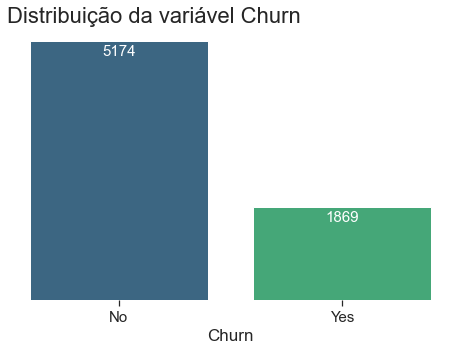

In [7]:
plot_countplot(dados=dados, 
               x='Churn', 
               titulo="Distribuição da variável Churn",
               label_x='Churn', 
    )

Podemos analisar também por variável de gênero para ver se existe algum impacto a pessoa ser, nesse caso, do gênero masculino ou feminino

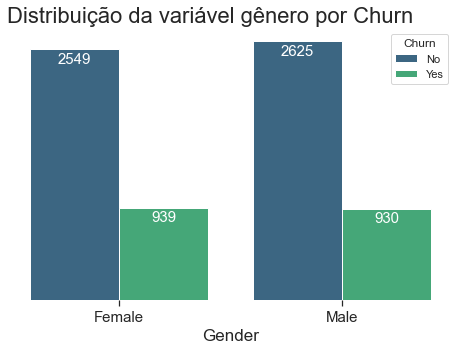

In [8]:
# Plotando o gráfico de Gênero

plot_countplot(dados=dados, 
               x='gender', 
               titulo="Distribuição da variável gênero por Churn",
               label_x='Gender', 
               hue='Churn'
    )

Podemos identificar que a variável "gender" **não possui impacto no churn**, uma vez que a proporção de pessoas que cancelaram o serviço entre os genêros é a mesma. 

Vamos plotar os gráficos para os serviços de internet:

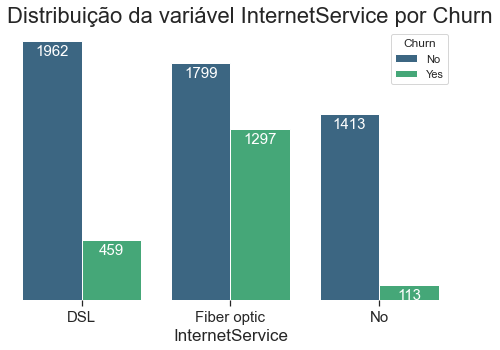

In [9]:
# Plotando o gráfico do serviço de internet

plot_countplot(dados=dados, 
               x='InternetService', 
               titulo="Distribuição da variável InternetService por Churn",
               label_x='InternetService', 
               hue='Churn'
    )

Percebe-se analisando o gráfico acima que os clientes que utilizam fibra ótica como serviço de internet possuem uma taxa de churn proporcionalmente maior que os demais. A Alura Voz poderia oferecer mais o tipo de serviço DSL já que possui uma evasão menor, ou identificar quais problemas que está acontecendo com o serviço de fibra ótica e melhorá-lo 

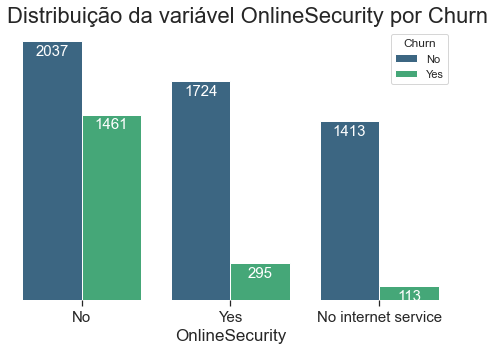

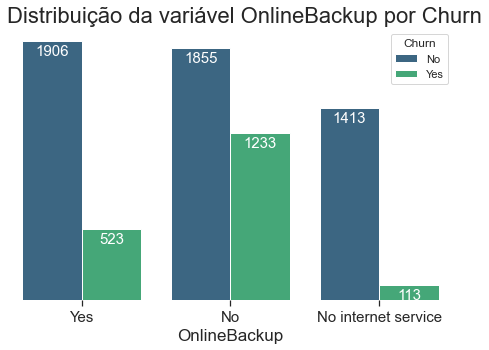

In [10]:
# Plotando o gráfico referente a se o cliente possui segurança online ou não

plot_countplot(dados=dados, 
               x='OnlineSecurity', 
               titulo="Distribuição da variável OnlineSecurity por Churn",
               label_x='OnlineSecurity', 
               hue='Churn'
    ) 

# Plotando o gráfico referente a se o cliente possui ou não um backup online

plot_countplot(dados=dados, 
               x='OnlineBackup', 
               titulo="Distribuição da variável OnlineBackup por Churn",
               label_x='OnlineBackup', 
               hue='Churn'
    )

Do gráfico acima temos que os clientes que não assinam a segurança online e também não possuem backup online tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de segurança online e backup online seria uma uma boa opção para reduzir a taxa de cancelamentos.

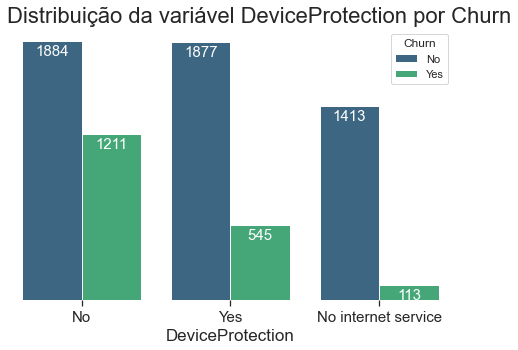

In [11]:
# Plotando o gráfico referente a se o cliente possui proteção do dispositivo ou não

plot_countplot(dados=dados, 
               x='DeviceProtection', 
               titulo="Distribuição da variável DeviceProtection por Churn",
               label_x='DeviceProtection', 
               hue='Churn'
    ) 

Do gráfico acima temos que os clientes que não possuem a proteção do dispositivo tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de proteção é uma boa opção para reduzir a taxa de cancelamento.

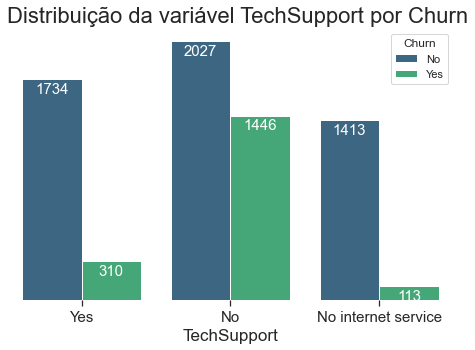

In [12]:
# Plotando o gráfico referente a se o cliente tem suporte técnico ou não.

plot_countplot(dados=dados, 
               x='TechSupport', 
               titulo="Distribuição da variável TechSupport por Churn",
               label_x='TechSupport', 
               hue='Churn'
    ) 

Clientes que não possuem suporte técnico tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de suporte técnico é uma boa opção para reduzir a taxa de cancelamentos.

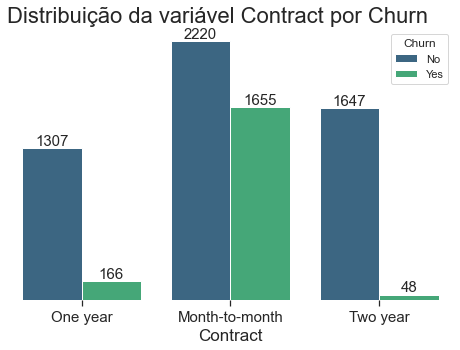

In [13]:
# Plotando o gráfico referente ao prazo do contrato do cliente

plot_countplot(dados=dados, 
               x='Contract', 
               titulo="Distribuição da variável Contract por Churn",
               label_x='Contract', 
               hue='Churn',
               small=True
    ) 

Pelo gráfico acima temos que os clientes que possuem um contrato mensal são os que tendem a deixar de utilizar os serviços da Alura Voz. Oferecer um serviço de contrato anual ou de dois anos é uma boa opção para reduzir a taxa de cancelamentos. 

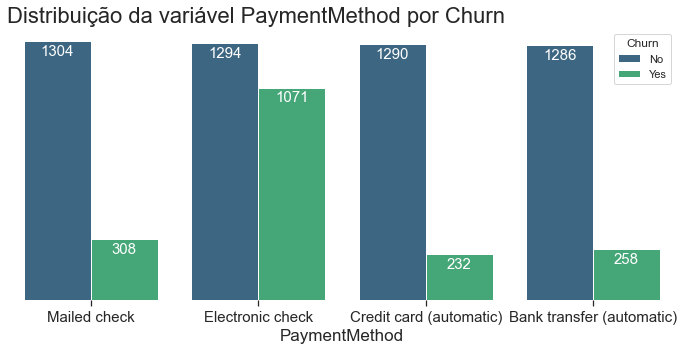

In [14]:
# Plotando o gráfico referente ao método de pagamento do cliente

plot_countplot(dados=dados, 
               x='PaymentMethod', 
               titulo="Distribuição da variável PaymentMethod por Churn",
               label_x='PaymentMethod', 
               hue='Churn', 
               figsize=(12, 5)
    ) 

Percebemos que as pessoas utilizam o método de pagamento "Eletronic check" tendem a cancelar os serviços da Alura Voz. Direcionar os clientes para outro método de pagamento é uma boa opção para reduzir a taxa de cancelamentos. 

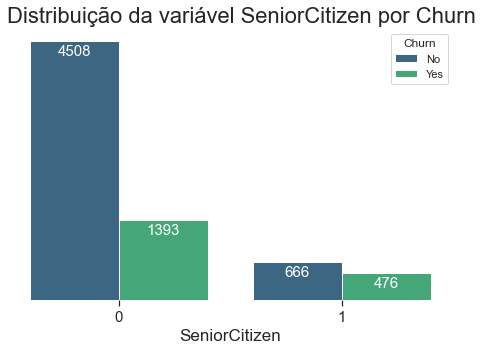

In [15]:
# Plotando o gráfico a se o cliente é idoso ou não por churn.

plot_countplot(dados=dados, 
               x='SeniorCitizen', 
               titulo="Distribuição da variável SeniorCitizen por Churn",
               label_x='SeniorCitizen', 
               hue='Churn'
    ) 

Apesar da quantidade de clientes idosos ser menor, a proporção de clientes que cancelaram o serviço entre os idosos é maior que a de clientes que não são idosos. Entender os motivos que estão levando a essa taxa de cancelamento entre os idosos e adotar medidas para melhorar o serviço para esses clientes é uma boa opção para reduzir a taxa de cancelamento.

Para fazer uma análise mais aprofundada podemos aplicar o boxplot, e para conhecer melhor pode ler esse artigo: [Melhorando a análise com o Boxplot](https://www.alura.com.br/artigos/melhorando-a-analise-com-o-boxplot).

In [16]:
# Imprimindo boxplot com o plotly

for col in ['tenure', 'Charges.Monthly']:
    fig = box(dados, x=col, color='Churn', orientation='h')
    fig.show()

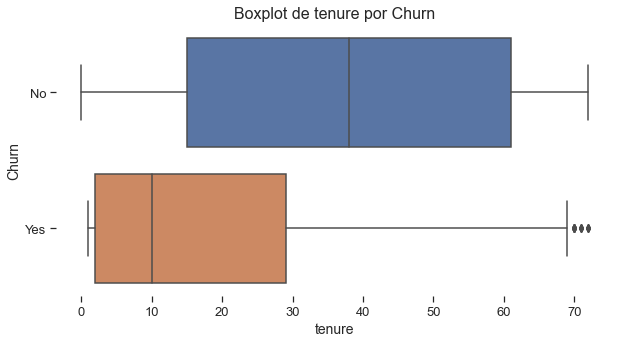

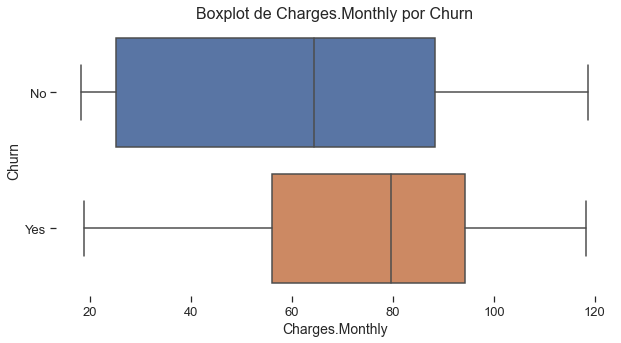

In [17]:
# Box Plot das features numéricas.

for col in ['tenure', 'Charges.Monthly']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='Churn', data=dados)
    plt.title(f"Boxplot de {col} por Churn", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Churn', fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

Analisando a feature "tenure", que representa o tempo de contrato do cliente, percebe-se que clientes que estão a mais tempo tendem a continuar a utilizar o serviço. 

Para a feature "Charges.Monthly", percebe-se que os clientes que adquirem serviços mais baratos tendem a continuar utilizando o serviço.

## Analisando feature

Vamos analisar as features "tenure" e "Charges.Monthly" e "Charges.Total" que aparentemente estão correlacionadas.

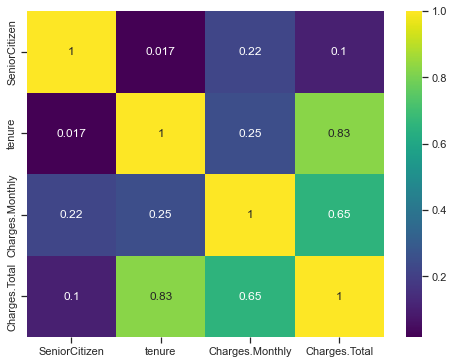

In [18]:
# Plotando a correlação entre as features numéricas
 
heatmap_corr(dados)

In [19]:
dados[['Charges.Monthly', 'Charges.Total']].corr()

,Charges.Monthly,Charges.Total
Charges.Monthly,1.000000,0.651182
Charges.Total,0.651182,1.000000


As features "tenure" e "Charges.Total" possuem uma correlação forte, o que significa que a medida que uma aumenta a outra aumenta também. Não é muito interessante trabalharmos com duas features correlacionadas, portanto vamos remover a feature "Charges.Total"